In [1]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# https://github.com/IDEA-Research/GroundingDINO/tree/main
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...


In [3]:
# Change to the GroundingDINO directory
import os
os.chdir('GroundingDINO')
os.getcwd()

'c:\\Users\\scott\\OneDrive\\Documents\\Protocols\\Python\\PyCharm\\workspaces\\pycharm_windows\\AI_Projects\\ai_cyberforensics\\object_detection\\GroundingDINO'

In [4]:
%pip install -e .

Obtaining file:///C:/Users/scott/OneDrive/Documents/Protocols/Python/PyCharm/workspaces/pycharm_windows/AI_Projects/ai_cyberforensics/object_detection/GroundingDINO
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for groundingdino
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Download the model weights
import wget
# Create a weights directory if it doesn't exist
os.makedirs('weights', exist_ok=True)

weight_url = 'https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth'
weight_path = os.path.join('weights', 'groundingdino_swint_ogc.pth')

if not os.path.exists(weight_path):
    wget.download(weight_url, weight_path)

# Change back to the original directory
os.chdir('..')
os.getcwd()



'c:\\Users\\scott\\OneDrive\\Documents\\Protocols\\Python\\PyCharm\\workspaces\\pycharm_windows\\AI_Projects\\ai_cyberforensics\\object_detection'

In [1]:
import groundingdino
import torch
from groundingdino.util.inference import load_model, load_image, predict

In [9]:
# Load model (update path to your checkpoint file)
config_path = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"

# Load the model weights
checkpoint_path = 'GroundingDINO/weights/groundingdino_swint_ogc.pth'

# Check if using CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the model
model = load_model(config_path,checkpoint_path, device=device)
print("✅ Grounding DINO loaded successfully.")


Using device: cpu
final text_encoder_type: bert-base-uncased
✅ Grounding DINO loaded successfully.


In [10]:
# Predict function
def predict_object(model, image, prompt, box_threshold=0.35, text_threshold=0.25, device="cpu"):
    boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=prompt,
    box_threshold=0.35,
    text_threshold=0.25,
    device="cpu",
    )
    return boxes, logits, phrases

Detected objects: ['gun']


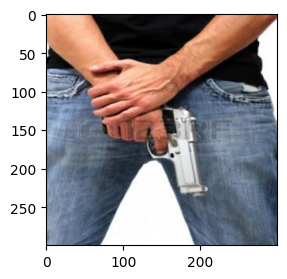

In [12]:
image_path = "../datasets/images/objects/raw/holding_gun.jpg"

image_pil, image = load_image(image_path)

prompt = "gun . knife . backpack"

_, _, phrases = predict_object(model, image, prompt)
print("Detected objects:", phrases)

# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.imshow(image_pil)

Detected objects: ['knife']


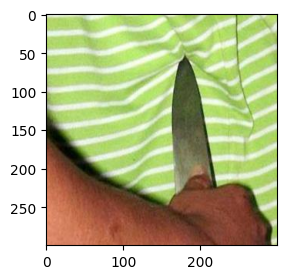

In [15]:
image_path = "../datasets/images/objects/raw/knife_195.jpg"

image_pil, image = load_image(image_path)

prompt = "gun . knife . backpack"

_, _, phrases = predict_object(model, image, prompt)
print("Detected objects:", phrases)

# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.imshow(image_pil)